</h1
ML1 Final Project
/>

<h2 align="center"> 
DATS 6202, Spring 2018, Final Project
</h2> 

<h1 align="center"> 
Prediciting Lifetime Physical and Sexual Intimate Partner Violence in a Conflicted-setting Area: South Sudan
</h1> 

<h4 align="center"> 
Richa Joshi |
Hninn Khin  |
Junior Ovince 
</h4>

<h5 align="center"> 
April 16th 2018 
</h5>

# A. Importing packages and the dataset

In [107]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [108]:
# Import data from csv file
data = pd.read_csv("SouthSoudan_everpartnered.csv")
data.head()

,loc,EP1,EP2,EP3,EM,physcur,sexcur,emotcur,SumMar,econviol,...,q95_1_forced_sexR,q95_2_coerced_sexR,q95_3_forced_degradingR,emotcur1,q71_limit_wife_famR,q72_want_knowR,q73_jealous_angryR,q74_accuse_wife_unfaithfulR,q49f_woman_spendReverse,TryForget
0,1,1,1,1,1,0,0,0,1,1,...,0,0,0,9,0,0,0,0,1,9
1,1,1,1,1,1,0,0,0,1,0,...,1,1,0,9,0,1,1,0,1,9
2,1,1,1,1,1,0,0,0,1,0,...,0,0,0,9,0,0,0,0,1,9
3,1,1,1,1,1,0,0,0,1,1,...,1,1,1,9,0,0,0,0,0,9
4,1,1,1,1,1,0,0,0,1,0,...,1,0,0,9,1,1,0,0,0,9


# B. Select specific and relevant features for the target 
- Based on the ecological model framework for violence against women and girl

In [109]:
new_data = data[["EP3","sexphys","sexphcur","econviol","emotvio","q1_age","edresp","q8_religion_R","SummaryTribe","workSum","SummaryIncome1","SumDrink2","q25_kind_toiletR","q26_fuel_cookingR",
               "q27_ty_houseR2","diffageSum","edpart","q67_prev_partner_work_R","q68_work_type_R","q70_partner_same_tribe_R","controlling","q34_husband_relatedR",
               "q36_have_other_wivesR","q38a_num_wife_orderR","MarriageAge","forced_M","Mar_LoveFam","Mar_RapPregAb","Mar_Economic","q44_dowryR","q49a_obligation_sexR",
               "q49b_share_authorityR","q49c_woman_roleR","q49d_men_headR","q49e_wife_obeyR","q49f_woman_spendR","q49b_share_authorityReverse","q50a_violence_privateR",
               "q50b_tolerate_violenceR","q50c_woman_rapedR","q50e_girl_rapeR","q51a_goes_outR","q51b_neglects_childrenR","q51c_argues_himR","q51d_refuse_sexR",
               "q4_displacement","q7_li_displacedR","q5_ever3conflicts","TraumaSum"]]
new_data.head()

,EP3,sexphys,sexphcur,econviol,emotvio,q1_age,edresp,q8_religion_R,SummaryTribe,workSum,...,q50c_woman_rapedR,q50e_girl_rapeR,q51a_goes_outR,q51b_neglects_childrenR,q51c_argues_himR,q51d_refuse_sexR,q4_displacement,q7_li_displacedR,q5_ever3conflicts,TraumaSum
0,1,1,0,1,1,27,0,3,3,1,...,1,0,0,0,0,0,3,9,0,0
1,1,1,0,0,1,24,1,3,3,1,...,1,0,0,1,1,0,3,9,0,0
2,1,0,0,0,0,25,0,3,3,1,...,1,1,1,1,1,1,3,9,0,0
3,1,1,0,1,1,30,0,3,3,4,...,1,1,0,1,1,0,3,9,0,0
4,1,1,0,0,1,35,0,4,3,1,...,1,1,1,1,1,1,3,9,0,0


### i. Simple check on the dataset

In [110]:
#Check for missing values
new_data.isnull().sum()

EP3                            0
sexphys                        0
sexphcur                       0
econviol                       0
emotvio                        0
q1_age                         0
edresp                         0
q8_religion_R                  0
SummaryTribe                   0
workSum                        0
SummaryIncome1                 0
SumDrink2                      0
q25_kind_toiletR               0
q26_fuel_cookingR              0
q27_ty_houseR2                 0
diffageSum                     0
edpart                         0
q67_prev_partner_work_R        0
q68_work_type_R                0
q70_partner_same_tribe_R       0
controlling                    0
q34_husband_relatedR           0
q36_have_other_wivesR          0
q38a_num_wife_orderR           0
MarriageAge                    0
forced_M                       0
Mar_LoveFam                    0
Mar_RapPregAb                  0
Mar_Economic                   0
q44_dowryR                     0
q49a_oblig

### ii. Split the features into their specific data category
- for a better  datapreprocessing

In [111]:
X_nominal = new_data[["EP3","q8_religion_R","SummaryTribe","workSum","SummaryIncome1","SumDrink2","q25_kind_toiletR","q26_fuel_cookingR",
               "q27_ty_houseR2","q67_prev_partner_work_R","q68_work_type_R","q34_husband_relatedR",
               "q36_have_other_wivesR","forced_M","Mar_LoveFam","Mar_RapPregAb","Mar_Economic","q44_dowryR",
               "q4_displacement","q7_li_displacedR",]]

X_binary = new_data[["econviol","emotvio",
               "q70_partner_same_tribe_R","controlling","q49a_obligation_sexR",
               "q49b_share_authorityR","q49c_woman_roleR","q49d_men_headR","q49e_wife_obeyR","q49f_woman_spendR","q50a_violence_privateR",
               "q50b_tolerate_violenceR","q50c_woman_rapedR","q50e_girl_rapeR","q51a_goes_outR","q51b_neglects_childrenR","q51c_argues_himR","q51d_refuse_sexR",
               "q5_ever3conflicts","TraumaSum"]]

X_ord_num = new_data[["edresp","diffageSum","edpart","q38a_num_wife_orderR","MarriageAge","q1_age"]]


### iii. Mapping the nominal variables

In [112]:
#Create the mapping dictionary

var_mapping = {}

# Create dictionary for mapping
var_mapping['EP3'] = { 1:'married',
                        2: 'cohabited',
                         3:'dating',
                         4:'former'}

var_mapping["q8_religion_R"] ={1:'Islam/other',
                         3: 'Catholic',
                         4:'Protestant'}

var_mapping["SummaryTribe"] ={1:'Dinka',
                         2: 'Nuer',
                         3:'Equatorian',
                         4: 'Other'}

var_mapping["workSum"] ={1:'Not_Working',
                         2: 'Home/Domes_Work',
                         3:'Student',
                         4: 'Working'}

var_mapping["SummaryIncome1"] ={1:'no_Inc/Huma_Aid',
                         2: 'Money_frm_Work',
                         3:'Supp_frm_husb/partner',
                         4: 'Supp_frm_Relat/Parents',
                         5: 'Other'}

var_mapping["SumDrink2"] ={1:'Tap/piped_Water',
                         2: 'tap/borehole/well',
                         3:'Unprot_spri/riv/pond',
                         4: 'Tanker/Truck/Water_Seller'}

var_mapping["q25_kind_toiletR"] ={1:'Own_Flush_Toilet',
                         2: 'Share_Flus_Toilet',
                         3:'Latrine',
                         4: 'None/River/Canal/Bush/Field'}

var_mapping["q26_fuel_cookingR"] ={1:'Wood',
                         2: 'Grass/leaves/other',
                         3:'Charcoal'}

var_mapping["q27_ty_houseR2"] ={1:'Hut_Tukul',
                         2: 'House/Apt_for_own_family',
                         3:'Communal_Shelter4gdp',
                         4: 'Temp_housing_tent'}

var_mapping["q67_prev_partner_work_R"] ={1:'Working',
                         2: 'Unemployed',
                         3:'Retired',
                         4: 'Student',
                         5: 'Disabled/Sick',
                         6: 'Other'}

var_mapping["q68_work_type_R"] ={1:'Never_worked',
                         2: 'Professional',
                         3:'Semi-Skilled',
                         4: 'Unskilled/Manual',
                         5: 'Military/Police',
                         6: 'Other'}


var_mapping["q34_husband_relatedR"] ={1:'Not_related',
                         2: 'Related',
                         8: 'No_answer',
                         9: 'Not_applicable'} 

var_mapping["forced_M"] = {1: 'yes',
                         0: 'no',
                         9: 'never'}

var_mapping["Mar_LoveFam"] = {1: 'yes',
                         0: 'no',
                         9: 'never'}

var_mapping["Mar_RapPregAb"] = {1: 'yes',
                         0: 'no',
                         9: 'never'}

var_mapping["Mar_Economic"] = {1: 'yes',
                         0: 'no',
                         9: 'never'}


var_mapping['q7_li_displacedR'] = {1:'All_life',
                            2:'>_1_year',
                            3:'<_1_year',
                            9:'Never'}

var_mapping['q4_displacement'] = {1:'current',
                              2:'former',
                                 3:'never'}
                          

var_mapping['q49e_wife_obeyR'] = {0: 'no',
                                   1:'yes'}

var_mapping['q49d_men_headR'] = {0: 'no',
                                   1:'yes'}

var_mapping['q49c_woman_roleR'] = {0: 'no',
                                   1:'yes'}

var_mapping['q49b_share_authorityR'] = {0: 'no',
                                   1:'yes'}

var_mapping['q49a_obligation_sexR'] = {0: 'no',
                                   1:'yes'}

var_mapping['q49a_obligation_sexR'] = {0: 'no',
                                   1:'yes'}

var_mapping['q44_dowryR'] = {0: 'no',
                             1:'yes',9:'never'}

var_mapping['q36_have_other_wivesR'] = {0: 'no',
                             1:'yes',9:'never'}

In [113]:
# Mapping the variables
X_nominal_labeled = X_nominal.copy()

def mapping(df, var, var_mapping):
    df[var] = df[var].map(var_mapping[var])
    
for var in X_nominal_labeled.columns:
    mapping(X_nominal_labeled, var, var_mapping)

In [114]:
X_nominal_labeled.head()

,EP3,q8_religion_R,SummaryTribe,workSum,SummaryIncome1,SumDrink2,q25_kind_toiletR,q26_fuel_cookingR,q27_ty_houseR2,q67_prev_partner_work_R,q68_work_type_R,q34_husband_relatedR,q36_have_other_wivesR,forced_M,Mar_LoveFam,Mar_RapPregAb,Mar_Economic,q44_dowryR,q4_displacement,q7_li_displacedR
0,married,Catholic,Equatorian,Not_Working,Money_frm_Work,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Temp_housing_tent,Unemployed,Never_worked,Not_applicable,yes,yes,no,no,yes,yes,never,Never
1,married,Catholic,Equatorian,Not_Working,Supp_frm_husb/partner,Tap/piped_Water,Latrine,Charcoal,Communal_Shelter4gdp,Working,Military/Police,Not_applicable,yes,no,yes,no,no,no,never,Never
2,married,Catholic,Equatorian,Not_Working,Supp_frm_husb/partner,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Communal_Shelter4gdp,Working,Semi-Skilled,Not_applicable,no,no,no,no,yes,yes,never,Never
3,married,Catholic,Equatorian,Working,Money_frm_Work,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Communal_Shelter4gdp,Retired,Never_worked,Not_applicable,yes,no,no,no,yes,yes,never,Never
4,married,Protestant,Equatorian,Not_Working,Money_frm_Work,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Communal_Shelter4gdp,Unemployed,Never_worked,Not_applicable,no,no,yes,no,no,yes,never,Never


### iv. Exploratory data analysis

#### A- Some chi2 tests
#### B- Some graphs

#### A- Independence test - Chi2
- Test the independence of the features with the target variable
- Test the independence among features 

In [115]:
#Create the data frame for the chi2 test

#combine all the features 
X_combined = pd.concat([X_nominal, X_binary, X_ord_num], axis=1)

#define the target variable
y = new_data[['sexphys']]

#combine features and target
df = pd.concat([X_combined, y], axis=1)
df.head()


,EP3,q8_religion_R,SummaryTribe,workSum,SummaryIncome1,SumDrink2,q25_kind_toiletR,q26_fuel_cookingR,q27_ty_houseR2,q67_prev_partner_work_R,...,q51d_refuse_sexR,q5_ever3conflicts,TraumaSum,edresp,diffageSum,edpart,q38a_num_wife_orderR,MarriageAge,q1_age,sexphys
0,1,3,3,1,2,1,4,1,4,2,...,0,0,0,0,9,1,2,1,27,1
1,1,3,3,1,3,1,3,3,3,1,...,0,0,0,1,2,3,2,2,24,1
2,1,3,3,1,3,1,4,1,3,1,...,1,0,0,0,2,3,0,2,25,0
3,1,3,3,4,2,1,4,1,3,3,...,0,0,0,0,2,1,2,2,30,1
4,1,4,3,1,2,1,4,1,3,2,...,1,0,0,0,2,1,0,2,35,1


###### --- Features and target independence

In [116]:
#chi2 test: all the features with the target variable
from sklearn.feature_selection import chi2

df_chi2 = chi2(df.iloc[:,:-2].values, df.iloc[:,-1].values)

# Convert the chi2 tests into one-dimensional 1darray with corresponding df column names as axis labels
f_chi2 = pd.Series(df_chi2[1], df.iloc[:,:-2].columns)

# Sort the array in ascending order of the pvalues
f_chi2.sort_values(ascending=True, inplace=True)

# Select the significant features 
sign_chi2 = f_chi2[f_chi2<=0.05]

print(sign_chi2.shape)
sign_chi2

(28,)


Mar_RapPregAb              3.568122e-69
Mar_Economic               5.174780e-67
forced_M                   1.638540e-64
emotvio                    1.814048e-56
Mar_LoveFam                2.941023e-52
q36_have_other_wivesR      6.489970e-44
q44_dowryR                 1.533966e-43
econviol                   1.178727e-32
q38a_num_wife_orderR       1.723091e-25
MarriageAge                2.387369e-22
controlling                1.094925e-12
TraumaSum                  4.163150e-10
edresp                     1.663741e-07
EP3                        1.153505e-05
q51d_refuse_sexR           1.575501e-05
q49a_obligation_sexR       2.525823e-05
q27_ty_houseR2             3.711013e-05
q67_prev_partner_work_R    9.871580e-05
q51a_goes_outR             2.446880e-04
q26_fuel_cookingR          7.428240e-04
SumDrink2                  1.102159e-03
q51c_argues_himR           2.168099e-03
SummaryTribe               4.630351e-03
q68_work_type_R            8.783306e-03
edpart                     9.402769e-03


###### --- Independence among features
- showing potential interaction and correlation

In [117]:
#create a function 

def chi2_interaction(feature_i, df=df):
    
    other_features = sign_chi2.index.drop(labels=feature_i)
    
    interaction_chi2 = pd.Series()
    
    for index in other_features:
        test_chi2 = chi2(df[index].values.reshape(-1,1), df[feature_i].values)
        interaction_chi2.set_value(index, test_chi2[1])
    
    interaction_chi2.sort_values(ascending=True, inplace=True)
        
    return interaction_chi2[interaction_chi2<=0.05]

In [118]:
chi2_interaction('forced_M')

Mar_RapPregAb                             [0.0]
Mar_Economic                              [0.0]
Mar_LoveFam                               [0.0]
q36_have_other_wivesR                     [0.0]
q44_dowryR                                [0.0]
q38a_num_wife_orderR                      [0.0]
MarriageAge                               [0.0]
EP3                        [1.03555332104e-161]
edresp                      [4.47620176787e-50]
q68_work_type_R             [6.10563726454e-19]
q67_prev_partner_work_R     [1.61094257761e-15]
edpart                      [2.03599838267e-12]
econviol                    [9.60679681955e-12]
emotvio                     [1.76632724454e-07]
q26_fuel_cookingR           [2.13640401913e-07]
SummaryTribe                [4.83026422624e-07]
q51d_refuse_sexR            [1.14930555332e-06]
q51c_argues_himR            [1.14597061599e-05]
q51a_goes_outR               [1.1728903224e-05]
q50c_woman_rapedR             [1.790074137e-05]
q50e_girl_rapeR             [0.000207472

In [119]:
chi2_interaction('q44_dowryR')

Mar_RapPregAb                             [0.0]
Mar_Economic                              [0.0]
forced_M                                  [0.0]
Mar_LoveFam                               [0.0]
q36_have_other_wivesR                     [0.0]
q38a_num_wife_orderR                      [0.0]
MarriageAge                               [0.0]
EP3                        [1.23614900013e-162]
edresp                      [5.31281236122e-51]
q68_work_type_R             [5.59408544951e-18]
SummaryTribe                 [4.9196745637e-15]
q67_prev_partner_work_R     [2.21802884342e-14]
q51d_refuse_sexR            [2.55827980006e-10]
econviol                    [6.69735343935e-10]
q51a_goes_outR              [2.47346636501e-09]
q51c_argues_himR            [1.31612537109e-08]
edpart                       [2.1162689441e-08]
q26_fuel_cookingR           [1.16221456498e-07]
emotvio                      [2.0310628107e-07]
q50c_woman_rapedR           [2.25167014323e-05]
q49a_obligation_sexR        [0.000129124

In [120]:
chi2_interaction('controlling')

econviol                   [6.54524984481e-24]
emotvio                    [1.71351491139e-20]
q51a_goes_outR             [3.76728005237e-05]
q51c_argues_himR           [6.04116326737e-05]
q51d_refuse_sexR            [0.00055840909131]
edpart                     [0.000671176442334]
q51b_neglects_childrenR      [0.0156610875383]
TraumaSum                    [0.0256447283005]
q50e_girl_rapeR              [0.0362652403351]
dtype: object

#### B- Data visualization between target and features, as well as some interaction

In [121]:
#create a labeled dataframe 

#map ordinal variable

var_mapping_ord = {}

# Create dictionary for mapping
var_mapping_ord['edresp'] = { 0:'no',
                        1: 'primary',
                         2:'secondary',
                         3:'higher'}
var_mapping_ord["diffageSum"] ={1:'same_older',
                         2: '1-10',
                         3:'11-20',
                         4: '21-30',
                         5:'31 + ', 
                         9:'no answer'}

var_mapping_ord["edpart"] ={1:'no',
                        2: 'primary',
                         3:'secondary',
                         4:'higher'}

var_mapping_ord["q38a_num_wife_orderR"] ={0:'no_other',
                         1: 'first',
                         2:'second',
                         3:'third +',
                         9:'never'}

var_mapping_ord["MarriageAge"] ={1:'15_or_younger',
                         2: '15-19',
                         3:'20-29',
                         4: '30 +',
                         9:'never'}

In [122]:
# Mapping the ordinal variables
X_ord_num_labeled = X_ord_num.copy()

for var in X_ord_num_labeled.columns[:-1]:
    mapping(X_ord_num_labeled, var, var_mapping_ord)

In [123]:
#map binary variable
var_mapping_bin = {}

var_mapping_bin["econviol"] ={0:'no',
                         1: 'yes'}

var_mapping_bin["emotvio"] ={0:'no',
                         1: 'yes'}

var_mapping_bin["q70_partner_same_tribe_R"] ={0:'no',
                         1: 'yes'}


var_mapping_bin["controlling"] ={0:'no',
                         1: 'yes'}

var_mapping_bin['TraumaSum'] = {0: 'no',
                            1: 'yes'}

var_mapping_bin['q5_ever3conflicts'] = {0: 'no',
                                    1: 'yes'}

var_mapping_bin['q51d_refuse_sexR'] = {0: 'no',
                                   1: 'yes'}

var_mapping_bin['q51c_argues_himR'] = {0: 'no',
                                   1: 'yes'}

var_mapping_bin['q51b_neglects_childrenR'] = {0: 'no',
                                          1:'yes'}

var_mapping_bin['q51a_goes_outR'] = {0: 'no',
                                 1:'yes'}

var_mapping_bin['q50e_girl_rapeR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q50c_woman_rapedR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q50b_tolerate_violenceR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q50a_violence_privateR'] = {0: 'no',
                                         1:'yes'}

var_mapping_bin['q49f_woman_spendR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q49e_wife_obeyR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q49d_men_headR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q49c_woman_roleR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q49b_share_authorityR'] = {0: 'no',
                                   1:'yes'}

var_mapping_bin['q49a_obligation_sexR'] = {0: 'no',
                                   1:'yes'}


In [124]:
#Mapping the binary variables
X_binary_labeled = X_binary.copy()

for var in X_binary_labeled.columns:
    mapping(X_binary_labeled, var, var_mapping_bin)

In [125]:
#create the feature labeled dataframe
X_combined_labeled = pd.concat([X_nominal_labeled, X_binary_labeled, X_ord_num_labeled], axis=1)

#create the complete labeled dataframe
df_labeled = pd.concat([X_combined_labeled, y], axis=1)
df_labeled.head()

,EP3,q8_religion_R,SummaryTribe,workSum,SummaryIncome1,SumDrink2,q25_kind_toiletR,q26_fuel_cookingR,q27_ty_houseR2,q67_prev_partner_work_R,...,q51d_refuse_sexR,q5_ever3conflicts,TraumaSum,edresp,diffageSum,edpart,q38a_num_wife_orderR,MarriageAge,q1_age,sexphys
0,married,Catholic,Equatorian,Not_Working,Money_frm_Work,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Temp_housing_tent,Unemployed,...,no,no,no,no,no answer,no,second,15_or_younger,27,1
1,married,Catholic,Equatorian,Not_Working,Supp_frm_husb/partner,Tap/piped_Water,Latrine,Charcoal,Communal_Shelter4gdp,Working,...,no,no,no,primary,1-10,secondary,second,15-19,24,1
2,married,Catholic,Equatorian,Not_Working,Supp_frm_husb/partner,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Communal_Shelter4gdp,Working,...,yes,no,no,no,1-10,secondary,no_other,15-19,25,0
3,married,Catholic,Equatorian,Working,Money_frm_Work,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Communal_Shelter4gdp,Retired,...,no,no,no,no,1-10,no,second,15-19,30,1
4,married,Protestant,Equatorian,Not_Working,Money_frm_Work,Tap/piped_Water,None/River/Canal/Bush/Field,Wood,Communal_Shelter4gdp,Unemployed,...,yes,no,no,no,1-10,no,no_other,15-19,35,1


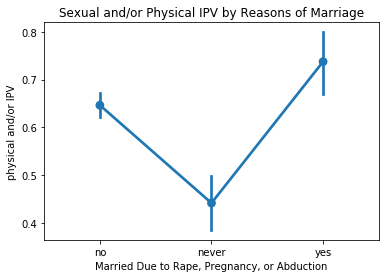

In [126]:
#some graphs
import seaborn as sns

sns.pointplot(x="Mar_RapPregAb", y="sexphys", data= df_labeled, aspect = 2) ;
plt.title("Sexual and/or Physical IPV by Reasons of Marriage")
plt.xlabel("Married Due to Rape, Pregnancy, or Abduction")
plt.ylabel("physical and/or IPV")
plt.show()


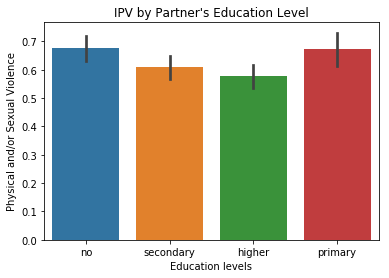

In [127]:
sns.barplot(x="edpart", y="sexphys",data=df_labeled);
plt.title("IPV by Partner's Education Level")
plt.xlabel("Education levels")
plt.ylabel("Physical and/or Sexual Violence")
plt.show()

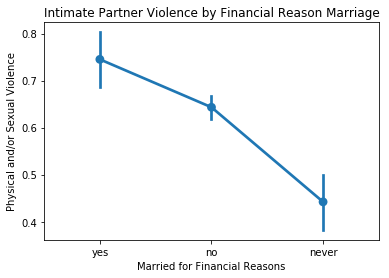

In [128]:
sns.pointplot(x="Mar_Economic", y="sexphys", data=df_labeled);
plt.title("Intimate Partner Violence by Financial Reason Marriage")
plt.xlabel("Married for Financial Reasons")
plt.ylabel("Physical and/or Sexual Violence")
plt.show()

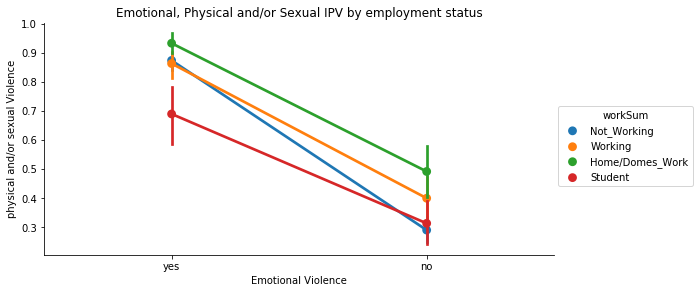

In [129]:
sns.factorplot(x="emotvio", y="sexphys",hue ="workSum", data=df_labeled,aspect= 2);
plt.title("Emotional, Physical and/or Sexual IPV by employment status")
plt.xlabel("Emotional Violence")
plt.ylabel("physical and/or sexual Violence")
plt.show()

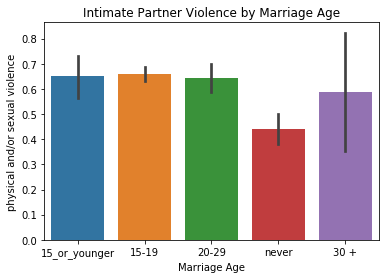

In [130]:
sns.barplot(x= "MarriageAge", y= "sexphys", data=df_labeled);
plt.title("Intimate Partner Violence by Marriage Age")
plt.xlabel("Marriage Age")
plt.ylabel("physical and/or sexual violence")
plt.show()

### iv. Create dummies for the nominal variables 
- One of the category will be dropped to avoid autocorrelation
- the category will be dropped based on their importance

In [131]:
# create the dummies dataframe
X_nominal_dummies = pd.get_dummies(X_nominal_labeled)
X_nominal_dummies.head()

,EP3_cohabited,EP3_dating,EP3_former,EP3_married,q8_religion_R_Catholic,q8_religion_R_Islam/other,q8_religion_R_Protestant,SummaryTribe_Dinka,SummaryTribe_Equatorian,SummaryTribe_Nuer,...,q44_dowryR_never,q44_dowryR_no,q44_dowryR_yes,q4_displacement_current,q4_displacement_former,q4_displacement_never,q7_li_displacedR_<_1_year,q7_li_displacedR_>_1_year,q7_li_displacedR_All_life,q7_li_displacedR_Never
0,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,1,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,0,0,0,1,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,1


In [132]:
# drop the columns that should be less related to IPV or have few observations
X_nominal_dummies.drop(['EP3_former','q8_religion_R_Islam/other','SummaryTribe_Other','workSum_Not_Working','SummaryIncome1_Other',
                       'SumDrink2_Tanker/Truck/Water_Seller', 'q25_kind_toiletR_None/River/Canal/Bush/Field','q26_fuel_cookingR_Grass/leaves/other',
                       'q27_ty_houseR2_Temp_housing_tent','q67_prev_partner_work_R_Other','q68_work_type_R_Other',
                       'q34_husband_relatedR_Not_applicable','q36_have_other_wivesR_never','Mar_LoveFam_never','Mar_RapPregAb_never',
                       'Mar_Economic_never','q44_dowryR_never','q4_displacement_never','q7_li_displacedR_Never'], axis = 1,inplace = True)




In [133]:
#create the features data frames that we will use to fit the models
X =X_nominal_dummies.join(X_ord_num).join(X_binary)
X.head()

,EP3_cohabited,EP3_dating,EP3_married,q8_religion_R_Catholic,q8_religion_R_Protestant,SummaryTribe_Dinka,SummaryTribe_Equatorian,SummaryTribe_Nuer,workSum_Home/Domes_Work,workSum_Student,...,q50a_violence_privateR,q50b_tolerate_violenceR,q50c_woman_rapedR,q50e_girl_rapeR,q51a_goes_outR,q51b_neglects_childrenR,q51c_argues_himR,q51d_refuse_sexR,q5_ever3conflicts,TraumaSum
0,0,0,1,1,0,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,0
1,0,0,1,1,0,0,1,0,0,0,...,0,1,1,0,0,1,1,0,0,0
2,0,0,1,1,0,0,1,0,0,0,...,1,1,1,1,1,1,1,1,0,0
3,0,0,1,1,0,0,1,0,0,0,...,1,1,1,1,0,1,1,0,0,0
4,0,0,1,0,1,0,1,0,0,0,...,0,1,1,1,1,1,1,1,0,0


In [134]:
# create the target data frame 
y = new_data[['sexphys']]
y.head()

,sexphys
0,1
1,1
2,0
3,1
4,1


# D. Split the data intro train and test sets 

In [135]:
# Randomly choose 30% of the data for testing
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [136]:
#Convert the dataframes to numpy arrays

##features
X_train = X_train_df.values
X_test = X_test_df.values

##target
y_train = y_train_df.values.reshape(-1,1).ravel()
y_test = y_test_df.values.reshape(-1,1).ravel()

# Fit and evaluate different models 
1. Random Forest 
2. Decision Tree 
3. Logistic Regression 
4. Support Vector Machine 

## 1. Random forest classifier

### 1.1 Determine the features importances 

In [137]:
from sklearn.ensemble import RandomForestClassifier

# Random forest classifier
rfc = RandomForestClassifier(n_estimators=10, random_state=0)

# Train the model 
rfc.fit(X_train, y_train)

# Get the feature importances
importances = rfc.feature_importances_

In [138]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances = pd.Series(importances, X_train_df.columns)

# Sort the array in descending order of the importances
f_importances.sort_values(ascending=False, inplace=True)

f_importances[:12]

emotvio                            0.088689
q1_age                             0.060199
controlling                        0.050664
econviol                           0.048562
q49a_obligation_sexR               0.028475
diffageSum                         0.027973
edpart                             0.025788
edresp                             0.024462
q67_prev_partner_work_R_Working    0.018537
MarriageAge                        0.017907
q51d_refuse_sexR                   0.017621
q50c_woman_rapedR                  0.015437
dtype: float64

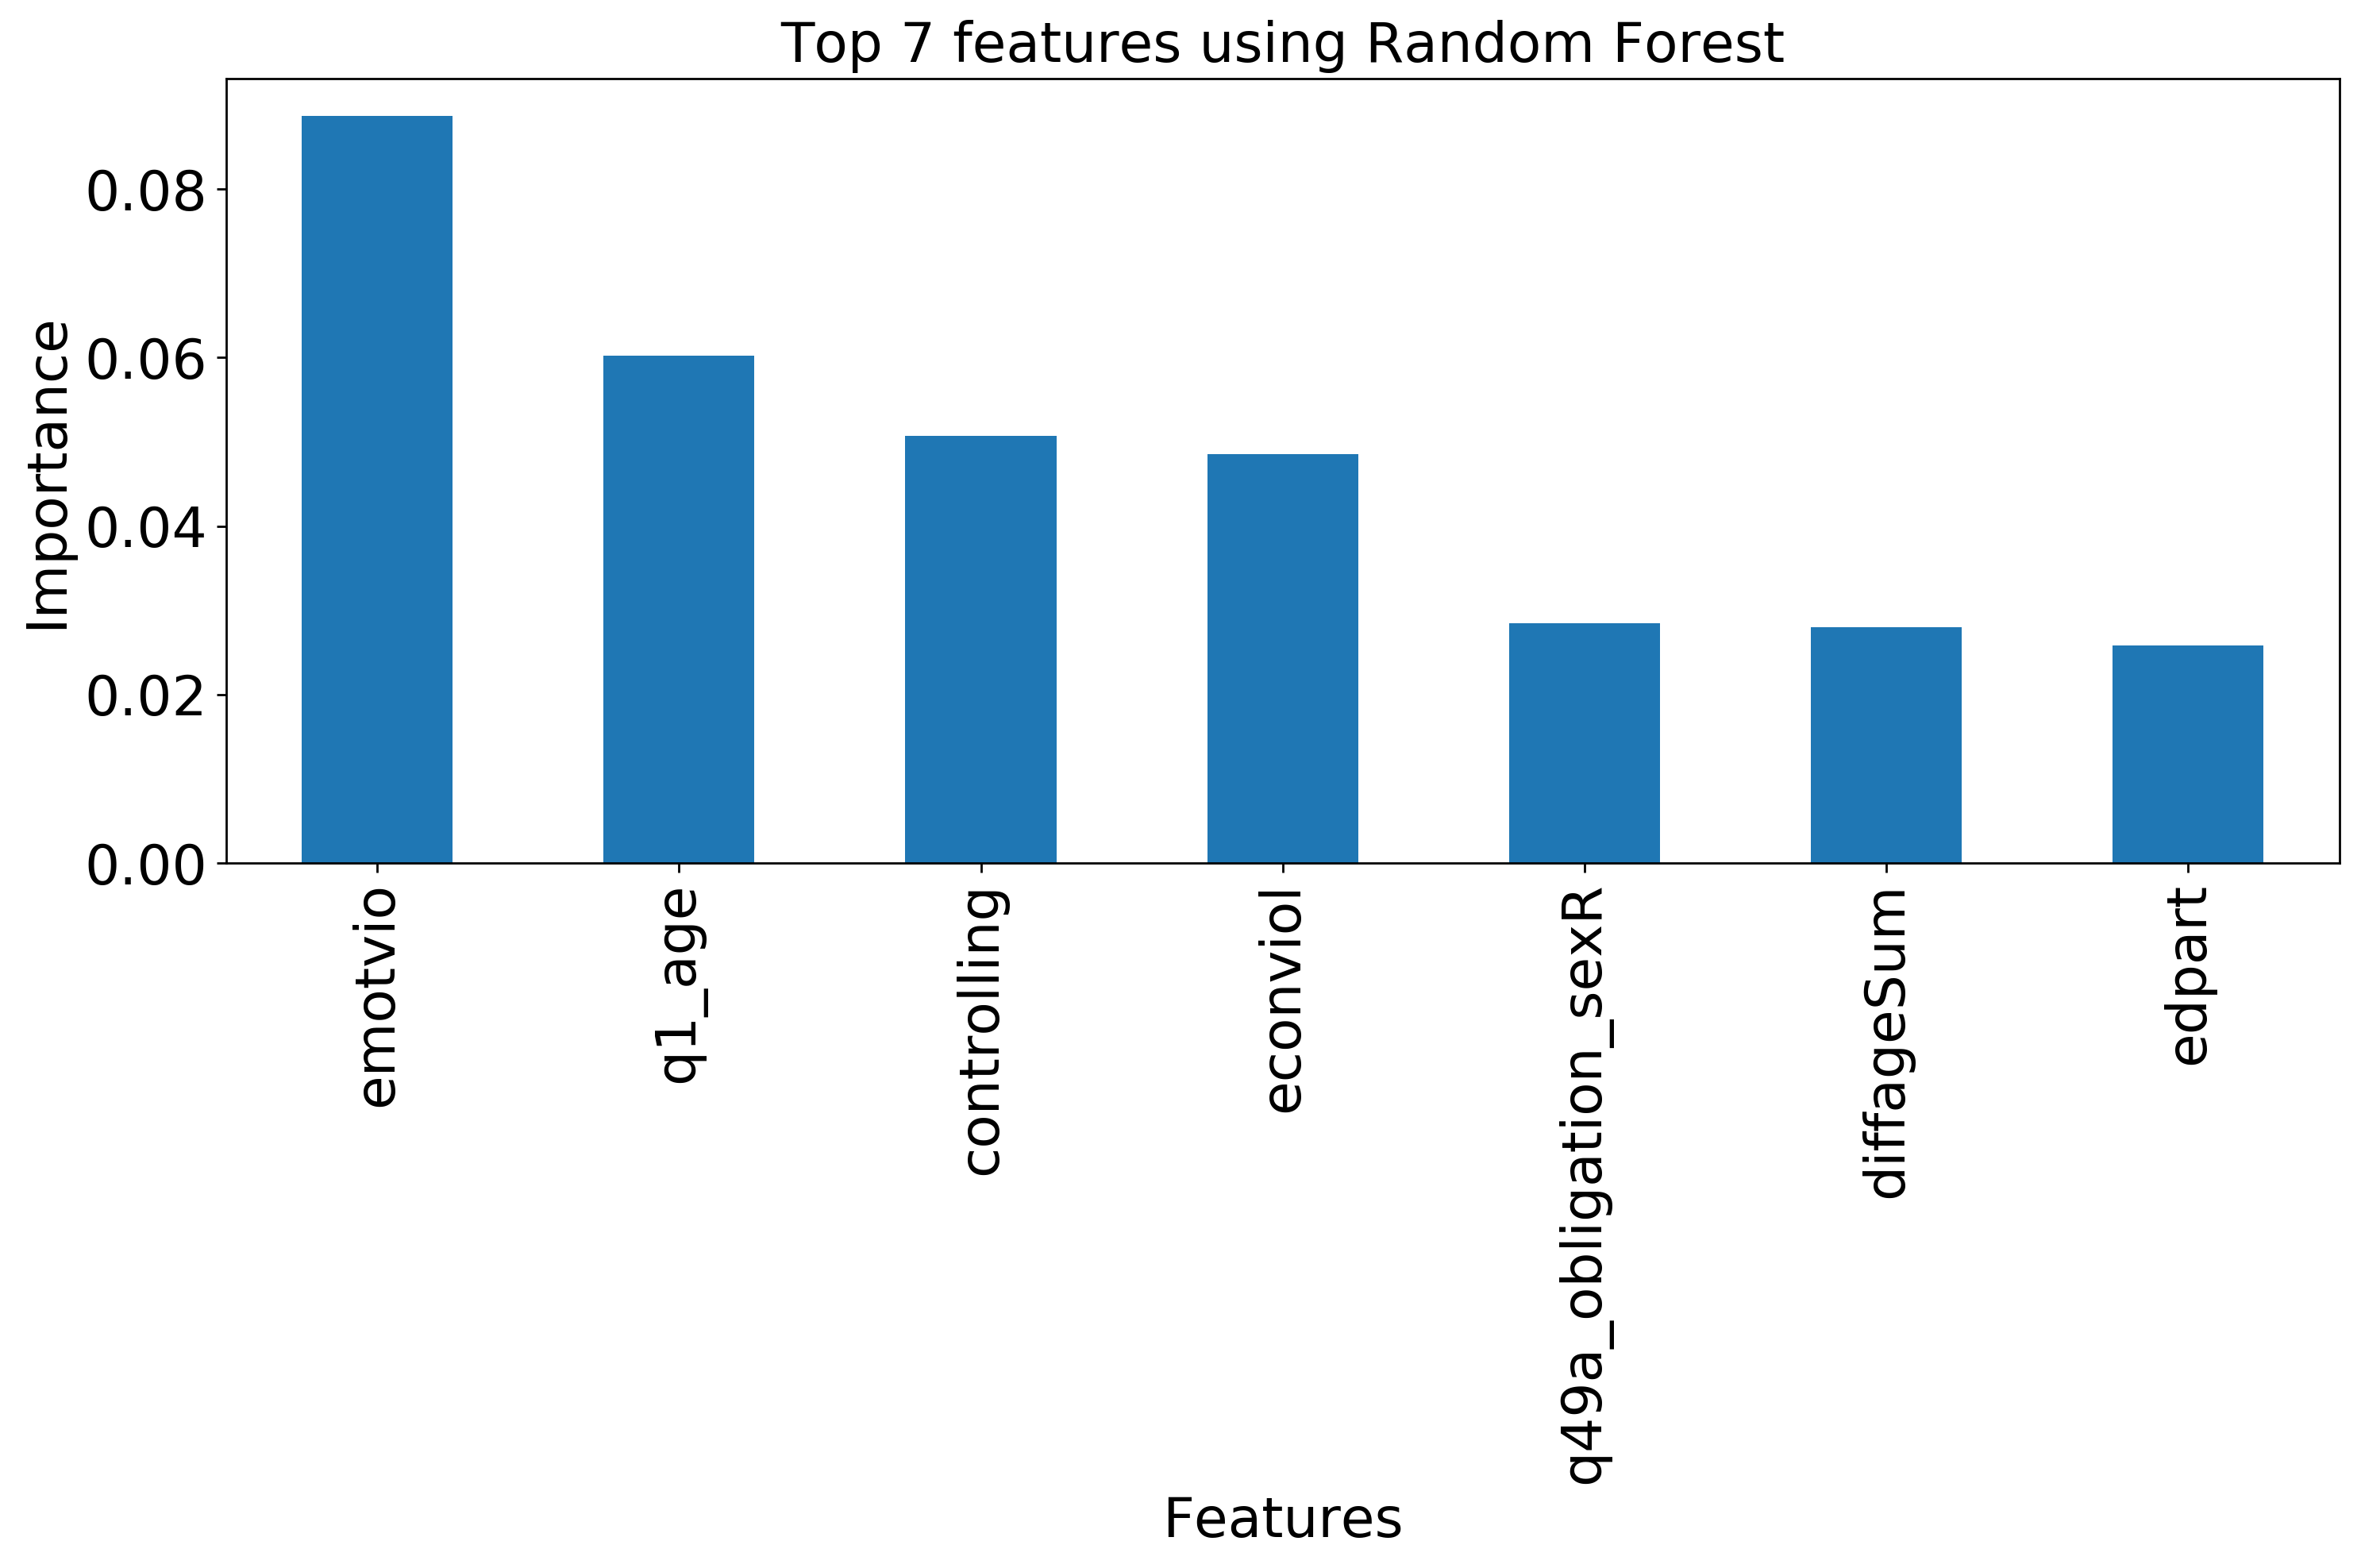

In [139]:
# Make the bar Plot from f_importances 
plt.figure(figsize=(12,8),dpi=250)
f_importances[:7].plot(kind='bar', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance', fontsize=20)
plt.title("Top 7 features using Random Forest", fontsize=20)

# Show the plot
plt.tight_layout()
plt.show()

### 1.2 Find the best scores using the top 6 features

In [140]:
from sklearn.metrics import precision_recall_fscore_support

top_fscores = pd.Series()


for k in range(1,importances[:6].shape[0]+1): 
    #Select the top features
    top = f_importances[:6].index[0:k].tolist()
    
    #Instantiate the Random forest classifier
    top_rfc = RandomForestClassifier(random_state=0)
    
    #Train the model
    top_rfc.fit(X_train_df[top].values, y_train)
    
    #Test the model
    y_test_pred = top_rfc.predict(X_test_df[top])
    
    #Calculate the precision, recall, and fscore and select the fscore
    score = precision_recall_fscore_support(y_test, y_test_pred, average='micro')[2]
    top_fscores.set_value("Top " + str(k), score)

print(top_fscores)

Top 1    0.771429
Top 2    0.762500
Top 3    0.750000
Top 4    0.750000
Top 5    0.748214
Top 6    0.737500
dtype: float64


### 1.3 Evaluate the best score using cross validation

In [141]:
#Cross-validation

from sklearn.model_selection import cross_val_score

scores_rft = cross_val_score(estimator=RandomForestClassifier(random_state=0),
                         X=X_train_df['emotvio'].values.reshape(-1,1),
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores_rft)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_rft), np.std(scores_rft)))

CV accuracy scores: [ 0.73282443  0.80916031  0.7480916   0.6870229   0.79230769  0.74615385
  0.76153846  0.77692308  0.82307692  0.78461538]
CV accuracy: 0.766 +/- 0.038


### 1.4 Create a learning curve 

In [142]:
#define a learning curve function

from sklearn.model_selection import learning_curve

def l_curve(estimator, df_train, title):
    train_sizes, train_scores, test_scores =\
                    learning_curve(estimator=estimator,
                                   X=df_train,
                                   y=y_train,
                                   train_sizes=np.linspace(0.1, 1.0, 10),
                                   cv=10,
                                   n_jobs=1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean,
             color='blue', marker='o',
             markersize=5, label='training accuracy')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean,
             color='green', linestyle='--',
             marker='s', markersize=5,
             label='validation accuracy')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.15, color='green')

    plt.grid()
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.ylim([0.5, 1.03])
    plt.tight_layout()
    plt.title(title)
    plt.show()

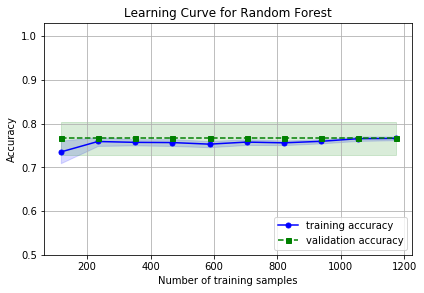

In [143]:
l_curve(RandomForestClassifier(random_state=0), X_train_df['emotvio'].values.reshape(-1,1), "Learning Curve for Random Forest")

### 1.5 Evaluate the final random forest model 
#### - using confusion matrix, the different metric scores, and a ROC curve

In [144]:
#Define a function to create the confusion matrix

from sklearn.metrics import confusion_matrix

def conf_mat (estimator, np_train, np_test, title):
    clf = estimator
    clf.fit(np_train, y_train)
    y_pred = clf.predict(np_test)
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i,
            s=confmat[i, j],
            va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.title(title)
    plt.show()
    



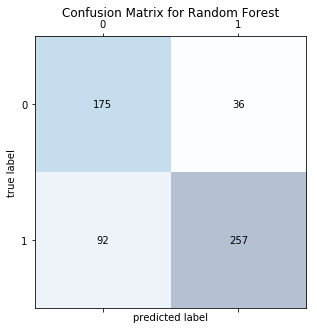

In [145]:
#create the confusion matrix for random forest
conf_mat(RandomForestClassifier(random_state=0), X_train_df['emotvio'].values.reshape(-1,1), X_test_df['emotvio'].values.reshape(-1,1), "Confusion Matrix for Random Forest")

#### Calculate the different scores  and the AUC
- precision
- recall 
- fscore

In [146]:
# Create a function to calculate the scores

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def different_scores (estimator, np_train, np_test, title):
    
    #instantiate the classifier and do predictions
    clf = estimator
    clf.fit(np_train, y_train)
    y_pred = clf.predict(np_test)

    #print the different scores 
    print('Precision: %.3f' % precision_score(
    y_true=y_test, y_pred=y_pred))
    print('Recall: %.3f' % recall_score(
    y_true=y_test, y_pred=y_pred))
    print('F1: %.3f' % f1_score(
    y_true=y_test, y_pred=y_pred))
    
    #create the AUC 
    fpr, tpr, _ = roc_curve(y_test,  y_pred)
    auc = roc_auc_score(y_test, y_pred)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.title(title)
    plt.show()

    

Precision: 0.877
Recall: 0.736
F1: 0.801


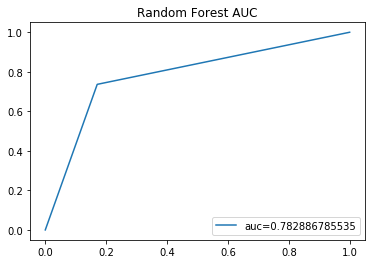

In [147]:
#random forest scores and AUC
different_scores(RandomForestClassifier(random_state=0), X_train_df['emotvio'].values.reshape(-1,1), X_test_df['emotvio'].values.reshape(-1,1), "Random Forest AUC")

## 2. Decision Tree classifier

### 2.1 Determine the features importances

In [148]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

# Random forest classifier
clf_tree = ExtraTreesClassifier(random_state=0)

# Train the model 
clf_tree = clf_tree.fit(X_train, y_train)

# Get the feature importances
importances_tree = clf_tree.feature_importances_

In [149]:
# Convert the importances into one-dimensional 1darray with corresponding df column names as axis labels
f_importances_tree = pd.Series(importances_tree, X_train_df.columns)

# Sort the array in descending order of the importances
f_importances_tree.sort_values(ascending=False, inplace=True)

f_importances_tree[:10]

emotvio                 0.150888
controlling             0.048597
econviol                0.041031
q1_age                  0.022495
q49a_obligation_sexR    0.018522
edpart                  0.018181
edresp                  0.018167
TraumaSum               0.017252
diffageSum              0.016839
MarriageAge             0.015493
dtype: float64

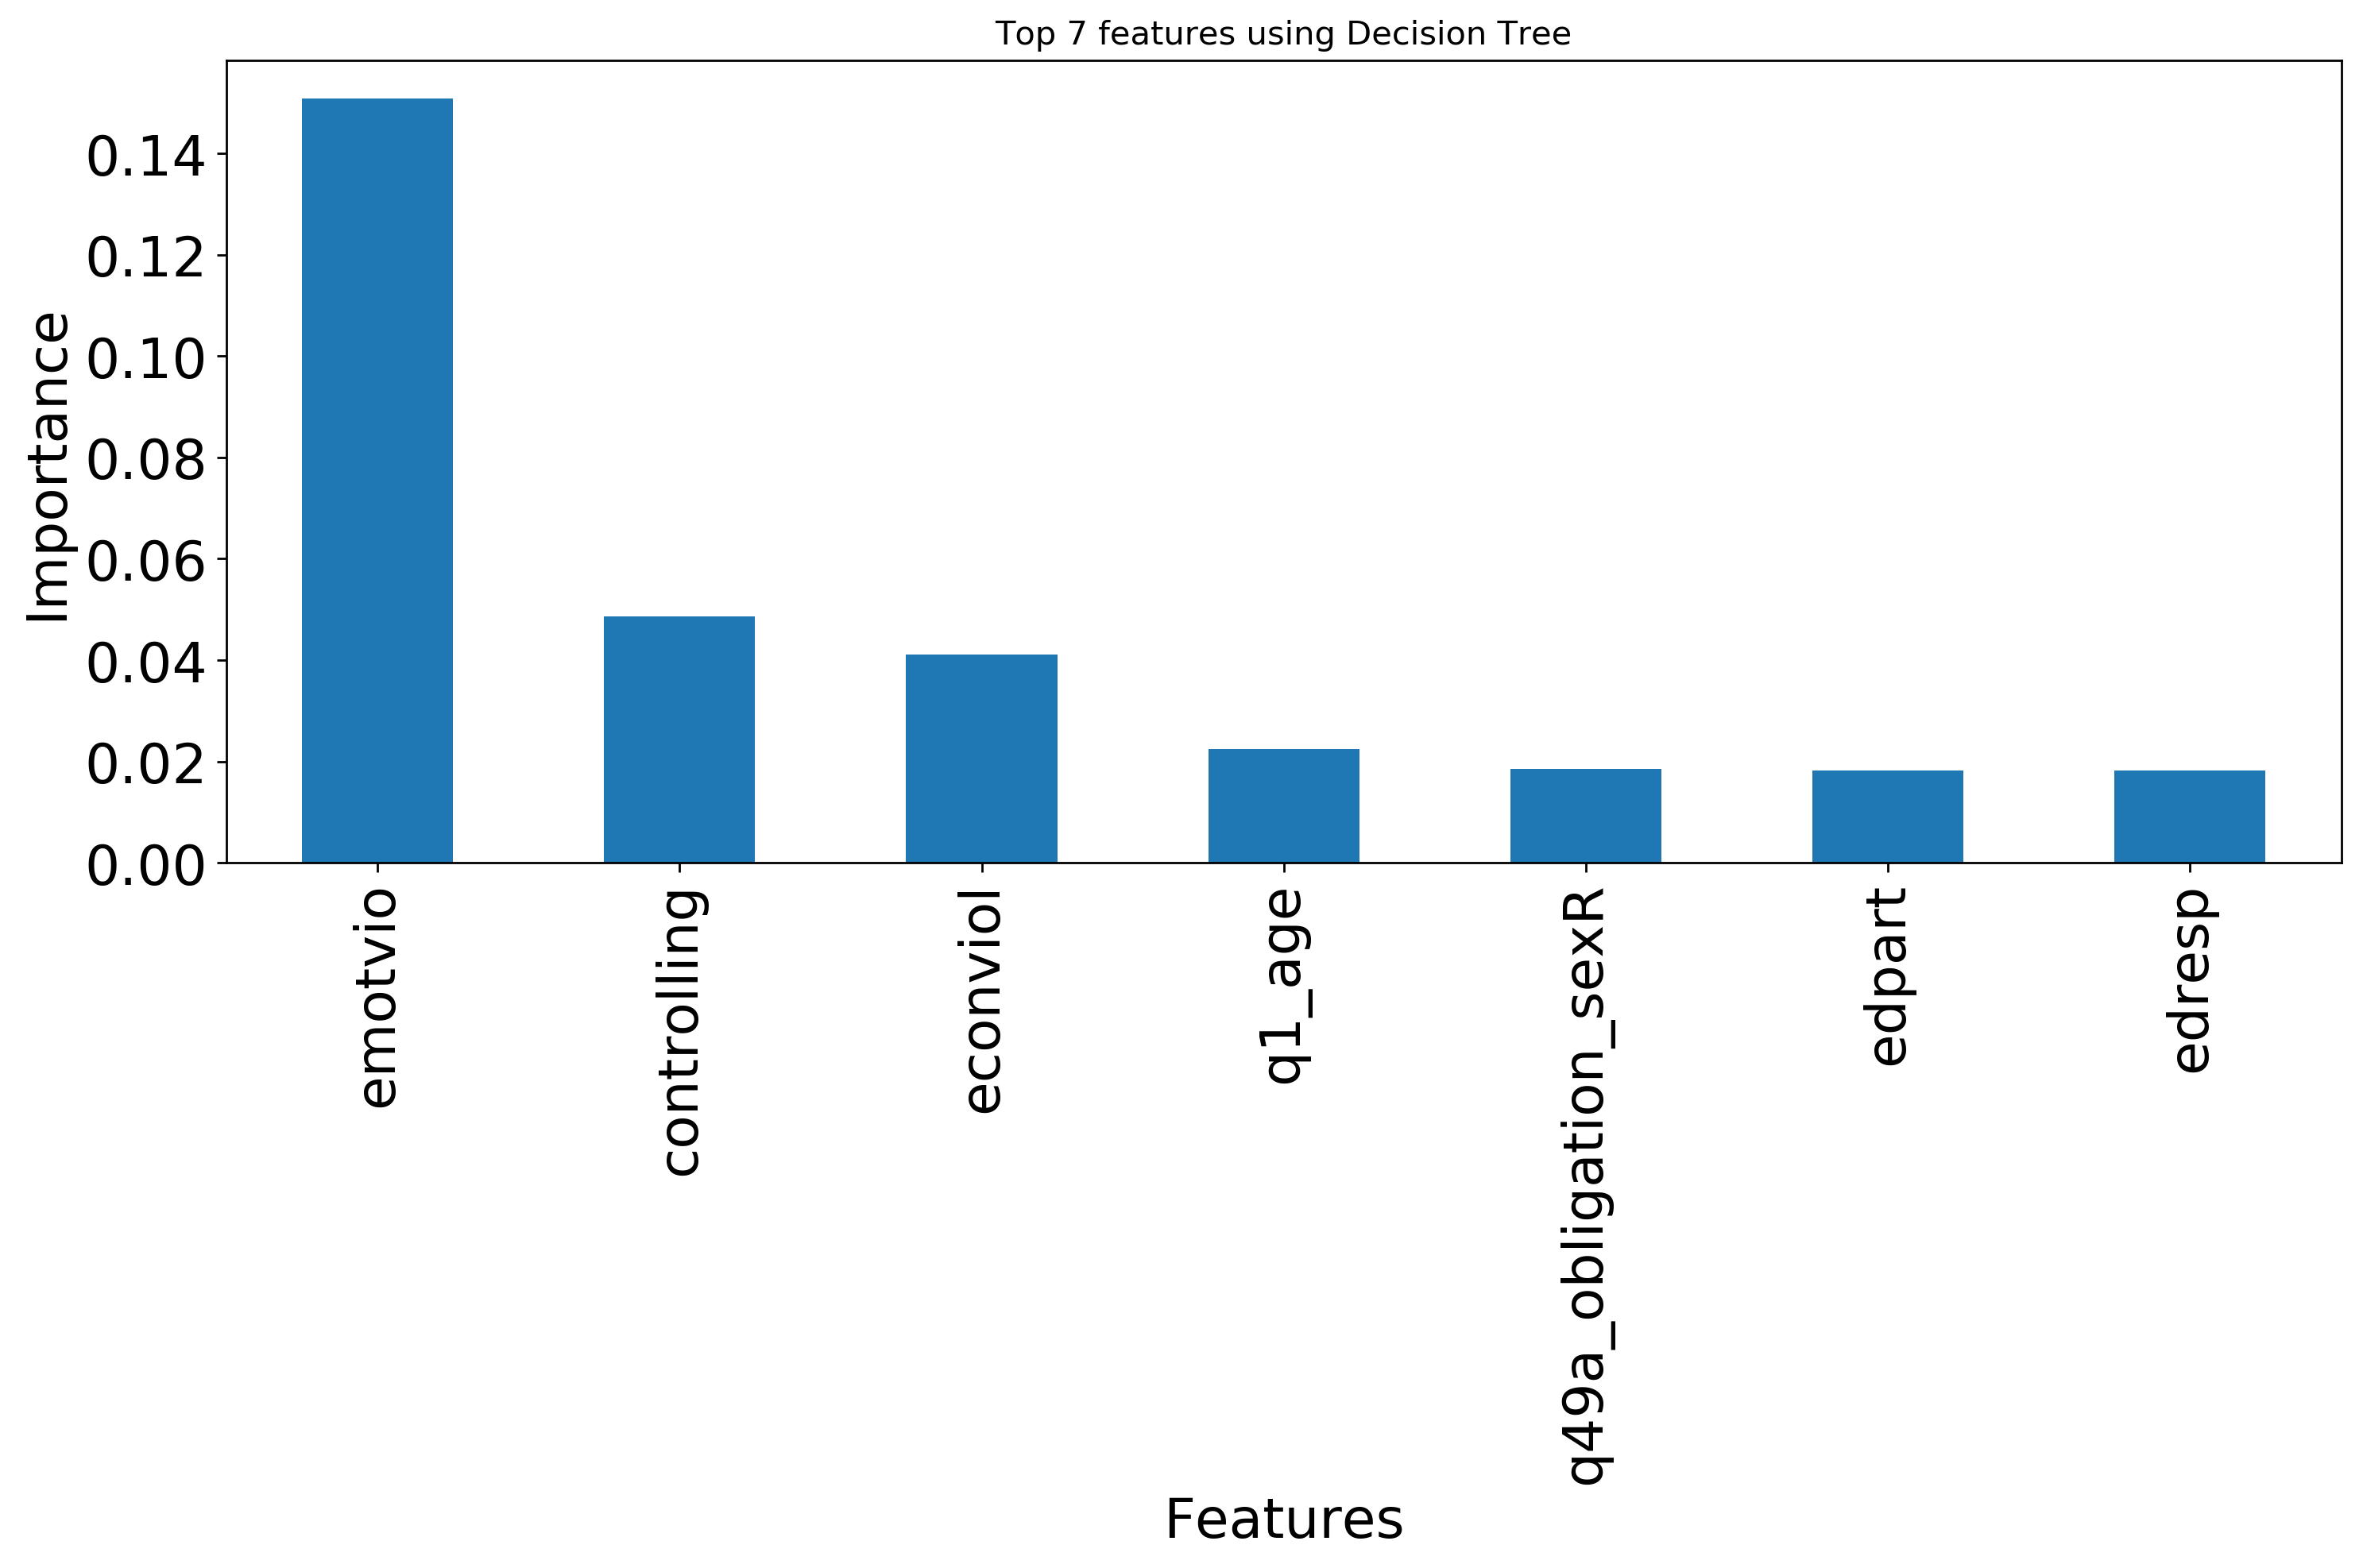

In [150]:
# Make the bar Plot from f_importances 
plt.figure(figsize=(12,8),dpi=250)
f_importances_tree[:7].plot(kind='bar', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Importance', fontsize=20)
plt.title("Top 7 features using Decision Tree")

# Show the plot
plt.tight_layout()
plt.show()

### 2.2 Find the best scores using the top 6 features

In [151]:
top_fscores_tree = pd.Series()

for k in range(1,importances_tree[:6].shape[0]+1): 
    #Select the top features
    topdt = f_importances_tree[:6].index[0:k].tolist()
    
    #Instantiate the Random forest classifier
    top_dt = DecisionTreeClassifier(random_state=0)
    
    #Train the model
    top_dt.fit(X_train_df[topdt].values, y_train)
    
    #Test the model
    y_test_pred = top_dt.predict(X_test_df[topdt])
    
    #Calculate the precision, recall, and fscore and select the fscore
    score = precision_recall_fscore_support(y_test, y_test_pred, average='micro')[2]
    top_fscores_tree.set_value("Top " + str(k), score)

print(top_fscores_tree)

Top 1    0.771429
Top 2    0.771429
Top 3    0.771429
Top 4    0.762500
Top 5    0.741071
Top 6    0.717857
dtype: float64


### N.B.- As the decision tree and the random forest yielded the same feature importance with the same variable, their evaluation and performance will be the same.

## 3. Logistic Regression classifier

### 3.1 Select the best logistic regression model by tuning hyperparameters such as C and the solver

In [152]:
# Define a gridsearch function to tune hyperparameters 

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


def grid_logistic ():
    
    pipe_lr = make_pipeline(StandardScaler(),
                       LogisticRegression(random_state=1))
     
    param_range = np.power(10.0, np.arange(-3, 3))
    param_grid = [{'logisticregression__C': param_range, 'logisticregression__solver':['liblinear']}, 
                  {'logisticregression__C': param_range, 'logisticregression__solver':['sag']}, 
                  {'logisticregression__C': param_range, 'logisticregression__solver':['saga']}]

    gs_lr = GridSearchCV(estimator = pipe_lr,
                        param_grid = param_grid, 
                        scoring = 'accuracy', 
                        cv=10)
    return gs_lr


##### -- use all the features

In [153]:
#fit the gridsearch on all the datasets
g1 = grid_logistic()
g1.fit(X_train, y_train)

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'logisticregression__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'logisticregression__solver': ['liblinear']}, {'logisticregression__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e...e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'logisticregression__solver': ['saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='

In [154]:
# find the best score and the best parameters 
print(g1.best_score_)
print(g1.best_params_)

0.779141104294
{'logisticregression__C': 0.10000000000000001, 'logisticregression__solver': 'liblinear'}


##### -- use the statistical significant features based on chi2 test

In [155]:
#fit the grid search on the statistical significant features considering the chi2 test results

#specify the columns for chi2 variables
columns_chi = ['Mar_RapPregAb_no','Mar_RapPregAb_yes','Mar_Economic_no','Mar_Economic_yes',
'forced_M_never','forced_M_no', 'forced_M_yes','emotvio',
'Mar_LoveFam_no','Mar_LoveFam_yes','q36_have_other_wivesR_no', 'q36_have_other_wivesR_yes',
'q44_dowryR_no','q44_dowryR_yes', 'econviol','q38a_num_wife_orderR',
'MarriageAge', 'controlling','TraumaSum','edresp','EP3_cohabited','EP3_dating', 'EP3_married','q51d_refuse_sexR','q49a_obligation_sexR','q27_ty_houseR2_Communal_Shelter4gdp',
'q27_ty_houseR2_House/Apt_for_own_family','q27_ty_houseR2_Hut_Tukul',
'q67_prev_partner_work_R_Disabled/Sick','q67_prev_partner_work_R_Retired','q67_prev_partner_work_R_Student',
'q67_prev_partner_work_R_Unemployed','q67_prev_partner_work_R_Working','q51a_goes_outR', 'q26_fuel_cookingR_Charcoal','q26_fuel_cookingR_Wood','SumDrink2_Tap/piped_Water',
'SumDrink2_Unprot_spri/riv/pond','SumDrink2_tap/borehole/well','q51c_argues_himR', 'SummaryTribe_Dinka','SummaryTribe_Equatorian', 'SummaryTribe_Nuer','q68_work_type_R_Military/Police',
'q68_work_type_R_Never_worked','q68_work_type_R_Professional','q68_work_type_R_Semi-Skilled', 'q68_work_type_R_Unskilled/Manual','edpart','q50c_woman_rapedR',
'q50e_girl_rapeR','q51b_neglects_childrenR']
g2 = grid_logistic()
g2.fit(X_train_df[columns_chi].values, y_train)

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'logisticregression__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'logisticregression__solver': ['liblinear']}, {'logisticregression__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e...e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'logisticregression__solver': ['saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='

In [156]:
# find the best score and the best parameters 
print(g2.best_score_)
print(g2.best_params_)

0.77990797546
{'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}


##### -- use the best feature selected by random Forest/Decision Tree

In [157]:
#fit the model on the feature selected by RF
g3=grid_logistic()
g3.fit(X_train_df['emotvio'].values.reshape(-1,1), y_train)

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'logisticregression__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'logisticregression__solver': ['liblinear']}, {'logisticregression__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e...e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02]), 'logisticregression__solver': ['saga']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='

In [158]:
# find the best score and the best parameters 
print(g3.best_score_)
print(g3.best_params_)

0.766104294479
{'logisticregression__C': 0.001, 'logisticregression__solver': 'liblinear'}


### 3.2 Create learning curves for the best estimator in the 3 sets

##### SET 1 - all features

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

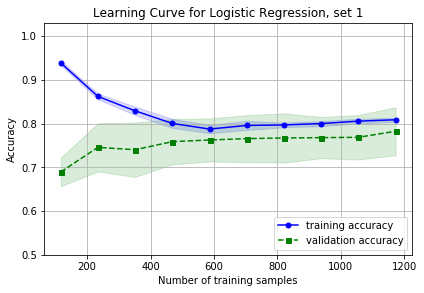

In [159]:
l_curve(g1.best_estimator_, X_train, "Learning Curve for Logistic Regression, set 1")

##### SET 2 - Chi2 features

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

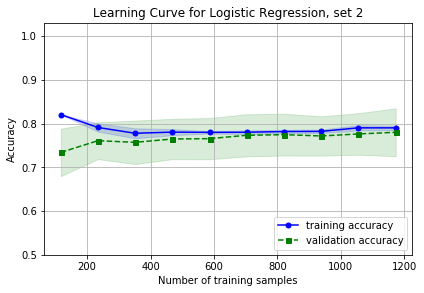

In [160]:
l_curve(g2.best_estimator_, X_train_df[columns_chi].values, "Learning Curve for Logistic Regression, set 2")

##### SET 3 - feature selected with Random forest

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


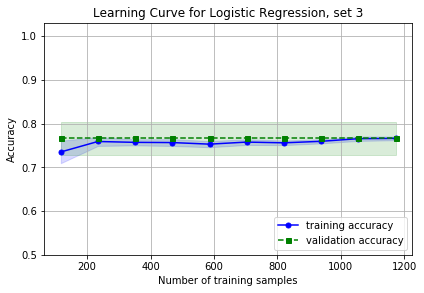

In [161]:
l_curve(g3.best_estimator_, X_train_df['emotvio'].values.reshape(-1,1), "Learning Curve for Logistic Regression, set 3")

### 3.3 Evaluate the best logistic regression model for each sets  
#### - using confusion matrix, the different metric scores, and a ROC curve

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


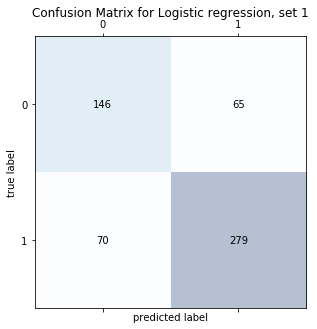

In [162]:
#create the confusion matrix for set1
conf_mat(g1.best_estimator_, X_train, X_test, "Confusion Matrix for Logistic regression, set 1")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


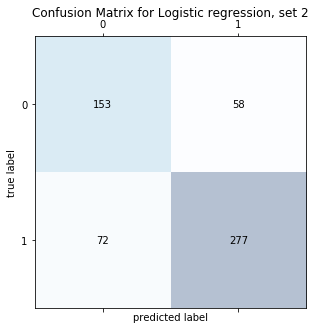

In [163]:
#create the confusion matrix for set2
conf_mat(g2.best_estimator_, X_train_df[columns_chi].values, X_test_df[columns_chi].values, "Confusion Matrix for Logistic regression, set 2")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


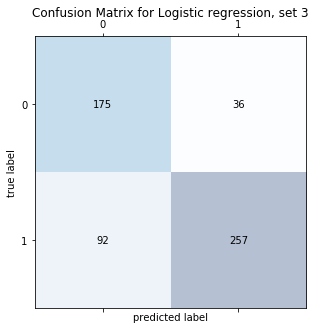

In [164]:
#create the confusion matrix for set3
conf_mat(g3.best_estimator_, X_train_df['emotvio'].values.reshape(-1,1), X_test_df['emotvio'].values.reshape(-1,1), "Confusion Matrix for Logistic regression, set 3")

#### Calculate the different scores  and the AUC
- precision
- recall 
- fscore

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Precision: 0.811
Recall: 0.799
F1: 0.805


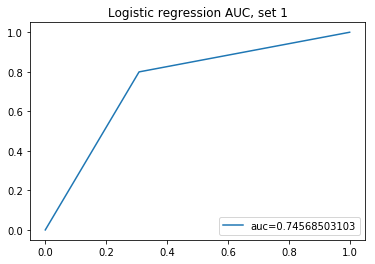

In [165]:
#scores and AUC for set1
different_scores(g1.best_estimator_, X_train, X_test, "Logistic regression AUC, set 1")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Precision: 0.827
Recall: 0.794
F1: 0.810


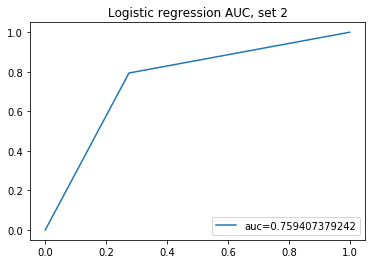

In [166]:
#scores and AUC for set2
different_scores(g2.best_estimator_, X_train_df[columns_chi].values, X_test_df[columns_chi].values, "Logistic regression AUC, set 2")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Precision: 0.877
Recall: 0.736
F1: 0.801


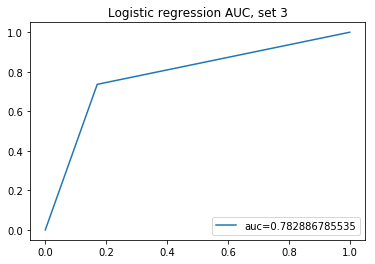

In [167]:
#scores and AUC for set3
different_scores(g3.best_estimator_, X_train_df['emotvio'].values.reshape(-1,1), X_test_df['emotvio'].values.reshape(-1,1), "Logistic regression AUC, set 3")

## 4. Support Vector Machine classifier

### 4.1 Select the best svm model by tuning hyperparameters such as C, the kernel, and gamma

In [168]:
# define a gridsearch function for svm 

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def grid_svm ():
    
    pipe_svc = make_pipeline(StandardScaler(),
                             SVC(random_state=1))

    param_range = [0.01, 0.1, 1.0]
    param_grid = [{'svc__C': param_range, 
                   'svc__kernel': ['linear']},
                  {'svc__C': param_range, 
                   'svc__gamma': param_range, 
                   'svc__kernel': ['rbf']}]

    gs_svc = GridSearchCV(estimator=pipe_svc, 
                      param_grid=param_grid, 
                      scoring='accuracy', 
                      cv=10)
    return gs_svc


##### -- use all the features

In [169]:
#fit the model on all the data
gv1 = grid_svm()
gv1.fit(X_train, y_train)

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'svc__C': [0.01, 0.1, 1.0], 'svc__kernel': ['linear']}, {'svc__C': [0.01, 0.1, 1.0], 'svc__gamma': [0.01, 0.1, 1.0], 'svc__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [170]:
# find the best score and the best parameters 
print(gv1.best_score_)
print(gv1.best_params_)

0.779141104294
{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


##### -- use the statistical significant features based on chi2 test

In [171]:
#fit the model on the chi2
gv2 = grid_svm()
gv2.fit(X_train_df[columns_chi].values, y_train)

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'svc__C': [0.01, 0.1, 1.0], 'svc__kernel': ['linear']}, {'svc__C': [0.01, 0.1, 1.0], 'svc__gamma': [0.01, 0.1, 1.0], 'svc__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [172]:
# find the best score and the best parameters 
print(gv2.best_score_)
print(gv2.best_params_)

0.773006134969
{'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


In [173]:
#fit the model on the features selected for RF
gv3 = grid_svm()
gv3.fit(X_train_df['emotvio'].values.reshape(-1,1), y_train)

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'svc__C': [0.01, 0.1, 1.0], 'svc__kernel': ['linear']}, {'svc__C': [0.01, 0.1, 1.0], 'svc__gamma': [0.01, 0.1, 1.0], 'svc__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [174]:
# find the best score and the best parameters 
print(gv3.best_score_)
print(gv3.best_params_)

0.766104294479
{'svc__C': 0.01, 'svc__kernel': 'linear'}


### 4.2 Create learning curves for the best estimator in the 3 sets

##### SET 1 - all features

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

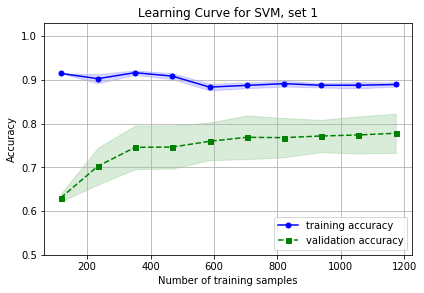

In [175]:
l_curve(gv1.best_estimator_, X_train, "Learning Curve for SVM, set 1")

##### SET 2 - Chi2 features

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

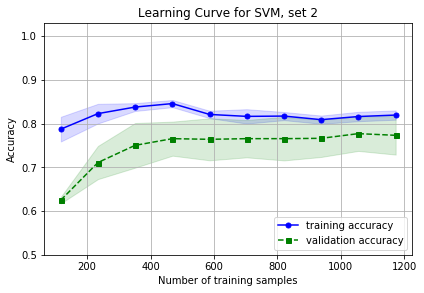

In [176]:
l_curve(gv2.best_estimator_, X_train_df[columns_chi].values, "Learning Curve for SVM, set 2")

##### SET 3 - feature selected with Random forest

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


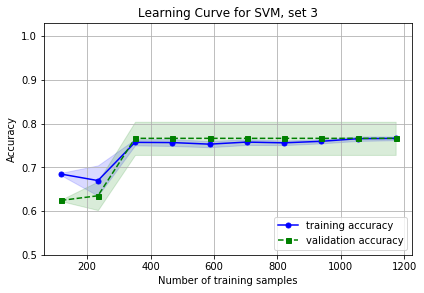

In [177]:
l_curve(gv3.best_estimator_, X_train_df['emotvio'].values.reshape(-1,1), "Learning Curve for SVM, set 3")

### 4.3 Evaluate the best SVM model for each set  
#### - using confusion matrix, the different metric scores, and a ROC curve

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


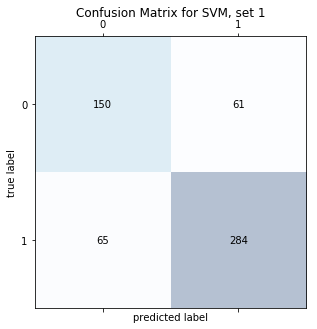

In [178]:
#create the confusion matrix for set1
conf_mat(gv1.best_estimator_, X_train, X_test, "Confusion Matrix for SVM, set 1")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


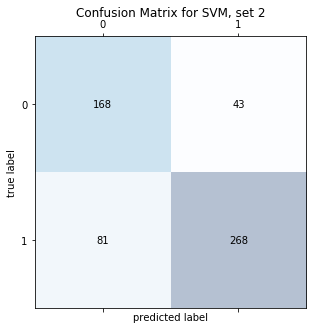

In [179]:
#create the confusion matrix for set2
conf_mat(gv2.best_estimator_, X_train_df[columns_chi].values, X_test_df[columns_chi].values, "Confusion Matrix for SVM, set 2")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


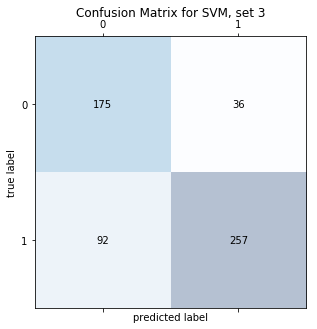

In [180]:
#create the confusion matrix for set3
conf_mat(gv3.best_estimator_, X_train_df['emotvio'].values.reshape(-1,1), X_test_df['emotvio'].values.reshape(-1,1), "Confusion Matrix for SVM, set 3")

#### Calculate the different scores  and the AUC
- precision
- recall 
- fscore

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Precision: 0.823
Recall: 0.814
F1: 0.818


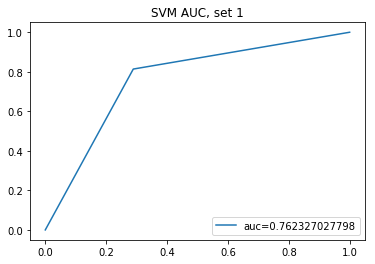

In [181]:
#scores and AUC for set1
different_scores(gv1.best_estimator_, X_train, X_test, "SVM AUC, set 1")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Precision: 0.862
Recall: 0.768
F1: 0.812


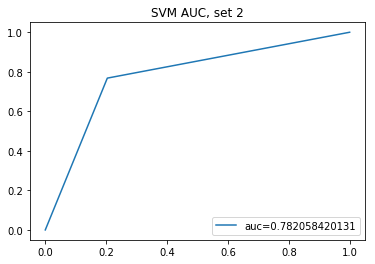

In [182]:
#scores and AUC for set2
different_scores(gv2.best_estimator_, X_train_df[columns_chi].values, X_test_df[columns_chi].values, "SVM AUC, set 2")

C:\Users\ovinc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Precision: 0.877
Recall: 0.736
F1: 0.801


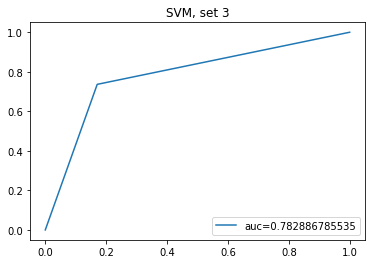

In [183]:
#scores and AUC for set3
different_scores(gv3.best_estimator_, X_train_df['emotvio'].values.reshape(-1,1), X_test_df['emotvio'].values.reshape(-1,1), "SVM, set 3")